<a href="https://colab.research.google.com/github/kam28/World_Happiness_Data-2021-_Analysis/blob/main/World_happines_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Happiness Data(2021) Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.set_style("darkgrid")
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(10,7)
plt.rcParams["figure.facecolor"]="#b4e3ff"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving world-happiness-report-2021.csv to world-happiness-report-2021.csv


In [ ]:
data = pd.read_csv("world-happiness-report-2021.csv")

In [ ]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
data_column=['Country name','Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [ ]:
data = data[data_column].copy()

In [ ]:
happy_df = data.rename({'Country name':'Country_name','Regional indicator':'Regional_indicator', 'Ladder score': 'Happiness_score', 'Logged GDP per capita': 'Logged_GDP_per_capita', 'Social support': 'Social_support', 'Healthy life expectancy': 'Healthy_life_expectancy', 'Freedom to make life choices': 'Freedom_to_make_life_choices', 'Generosity':'Generosity', 'Perceptions of corruption':'Perceptions_of_corruption'},axis=1)

In [ ]:
happy_df.head()

,Country_name,Regional_indicator,Happiness_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [ ]:
happy_df.isnull().sum()

Country_name                    0
Regional_indicator              0
Happiness_score                 0
Logged_GDP_per_capita           0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
dtype: int64

Text(0.5, 0, 'happiness score')

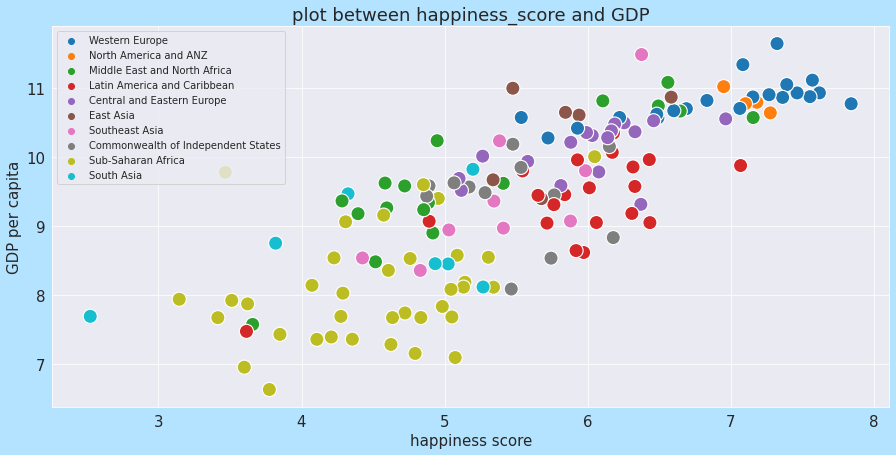

In [ ]:
plt.rcParams['figure.figsize']= (15,7)
plt.title('plot between happiness_score and GDP')       
sns.scatterplot(y =happy_df["Logged_GDP_per_capita"], x=happy_df["Happiness_score"], hue= happy_df["Regional_indicator"],s=200);    
    
plt.legend(loc = 'upper left', fontsize = '10')    
plt.ylabel('GDP per capita')    
plt.xlabel('happiness score')    
    


In [ ]:
GDP_Region= happy_df.groupby('Regional_indicator')[['Logged_GDP_per_capita']].sum()

In [ ]:
GDP_Region

,Logged_GDP_per_capita
Regional_indicator,
Central and Eastern Europe,171.854
Commonwealth of Independent States,112.822
East Asia,62.206
Latin America and Caribbean,187.400
Middle East and North Africa,164.324
North America and ANZ,43.238
South Asia,60.778
Southeast Asia,84.793
Sub-Saharan Africa,290.707


In [ ]:
GDP_Region.plot.pie(autopct="%1.1f%%")
plt.title("GDP by region")
plt.labels("")


In [ ]:
Total_countries= happy_df.groupby('Regional_indicator')[['Country_name']].count()
Total_countries

,Country_name
Regional_indicator,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


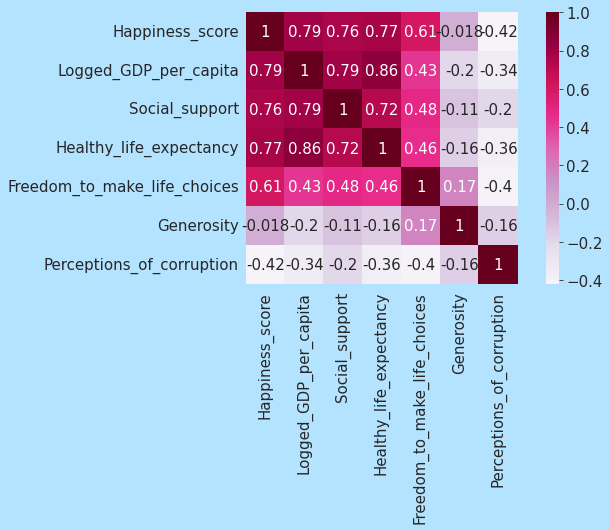

In [ ]:
cor=happy_df.corr(method="pearson")
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,annot=True,mask=np.zeros_like(cor,dtype=np.bool),cmap="PuRd",square=True,ax=ax)

In [ ]:
corruption= happy_df.groupby('Regional_indicator' )[['Perceptions_of_corruption']].mean()
corruption

,Perceptions_of_corruption
Regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

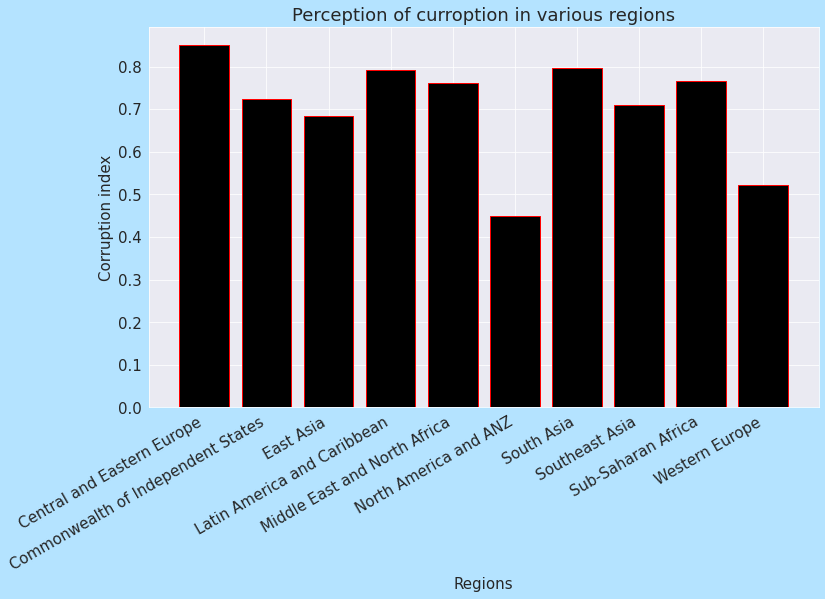

In [ ]:
fig = plt.figure(figsize =(12, 7))
plt.title('Perception of curroption in various regions')
plt.xlabel('Regions')
plt.ylabel('Corruption index')
plt.xticks(rotation=30, ha="right")
plt.bar(corruption.index, corruption.Perceptions_of_corruption,color='black',edgecolor='red')

In [ ]:
top_10 = happy_df.head(10)
top_10

,Country_name,Regional_indicator,Happiness_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338
5,Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270
6,Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242
9,Austria,Western Europe,7.268,10.906,0.934,73.3,0.908,0.042,0.481


In [ ]:
bottom_10 = happy_df.tail(10)
bottom_10

,Country_name,Regional_indicator,Happiness_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800
141,Tanzania,Sub-Saharan Africa,3.623,7.876,0.702,57.999,0.833,0.183,0.577
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


Text(596.1068181818181, 0.5, 'Life expectancy')

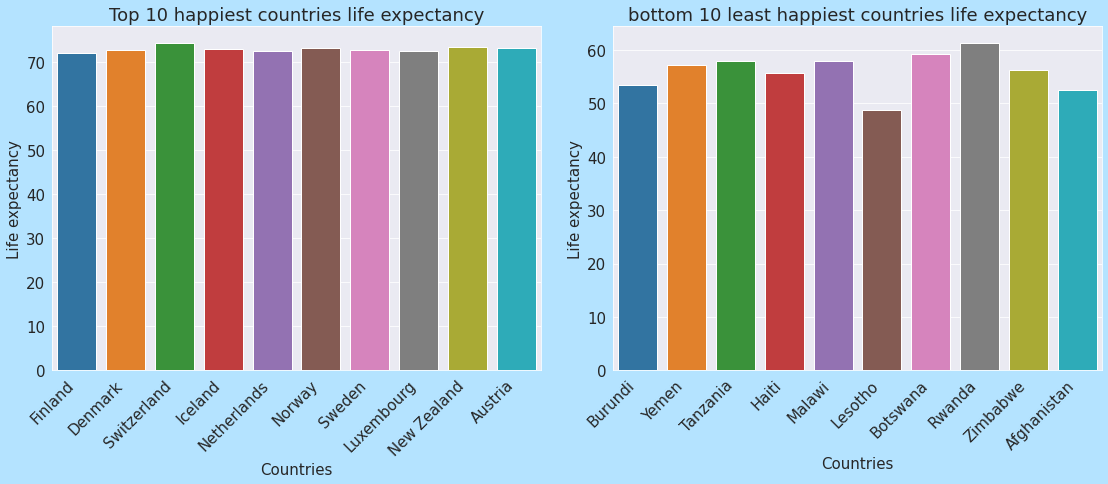

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels= top_10.Country_name
axes[0].set_title('Top 10 happiest countries life expectancy')
axes[0].set_xticklabels(xlabels,rotation=45, ha ="right")
sns.barplot(x = top_10.Country_name, y = top_10.Healthy_life_expectancy,ax=axes[0])
axes[0].set_xlabel('Countries')
axes[0].set_ylabel('Life expectancy')


xlabels= bottom_10.Country_name
axes[1].set_title('bottom 10 least happiest countries life expectancy')
axes[1].set_xticklabels(xlabels,rotation=45, ha ="right")
sns.barplot(x = bottom_10.Country_name, y = bottom_10.Healthy_life_expectancy,ax=axes[1])
axes[1].set_xlabel('Countries')
axes[1].set_ylabel('Life expectancy')
